### CSE5ML Lab 7B: Optimizing Neural Network with Keras

### Investigating the training process in TensorFlow

In [1]:
# Load the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# load the dataset
filename = 'diabetes.csv'
dataframe = pd.read_csv(filename, header=0) # first row is set as the column name of the dataframe
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_Test, Y_train, Y_Test = train_test_split(X, Y, test_size=77, random_state=7)

Using TensorFlow backend.


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


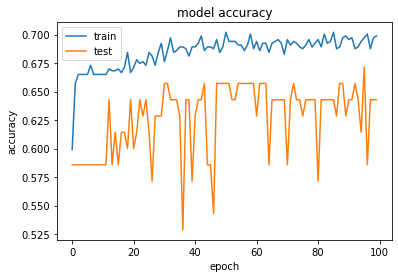

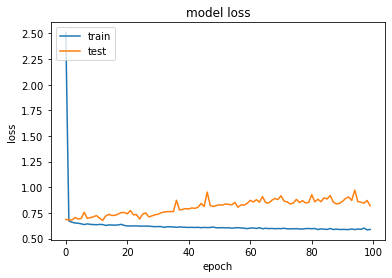

In [3]:
tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) #Change the optimizer to sgd and see what happens
# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

You can identify that **overfitting** appears, since test loss increases after around 10 epochs.
There are several common techiniques to aviod overfitting: 
1. Early stopping: monitor model performance on a validation set and stop training when performance degrades. 
   So in our case, you can try setting training epochs to 10.
2. Simplify the model: remove layers or reduce the number of neurons to make the network smaller.
3. Dropout: randomly drops neurons from the neural network during training. 
   So in our case, you can try *model.add(Dropout(rate))* where rate is a float between 0 and 1. For example, rate=0.1 will     
   drops 10% neurons from the network.
4. Provide more data: increasing size of the training data.
5. Regulization: add a penalty to the loss function in proportion to the size of the weights in the model.

You can check this link for further information: https://medium.com/analytics-vidhya/the-perfect-fit-for-a-dnn-596954c9ea39

in this lab, 
### Let's try to simplify the model with fewer number of neurons

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


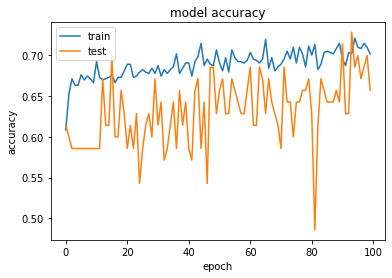

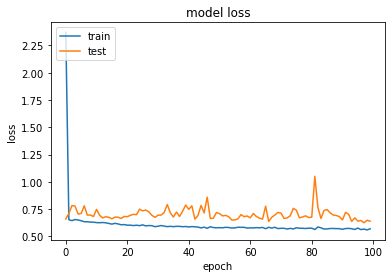

In [4]:
tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) #Change the optimizer to sgd and see what happens
# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We have reduced overfitting, but we find that the validation loss fluctuates a lot. It may results from a too big learning rate which leads to a big change on parameters, while your network only needs a slight change after some training. So let's try change our optimization algorithms, and see how it can change the network learning performance.

### Optimization in TensorFlow
Optimize weights given a loss. See [documentation](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers). The following example compare three algorithm to train the neural networks with same structures.
- [SGD](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers/SGD)
- [RMSProp](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers/RMSprop)
- [Adam](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers/Adam)

I found the two links below very useful in understanding the optimization algorithms, you can take a read if you are interested:

https://ruder.io/optimizing-gradient-descent/

https://heartbeat.fritz.ai/exploring-optimizers-in-machine-learning-7f18d94cd65b

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


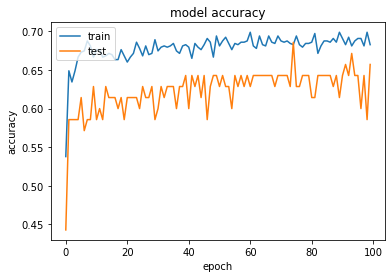

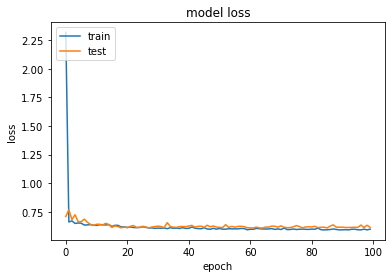

In [5]:
#change the optimizer to momentum 
from keras.optimizers import SGD

tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#change sgd with momentum
learning_rate = 0.001
epochs = 100
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.8, decay=decay_rate) #change momentum and lr and see how it goes, for example,lr=0.1 and momentum=0.7
# Compile model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


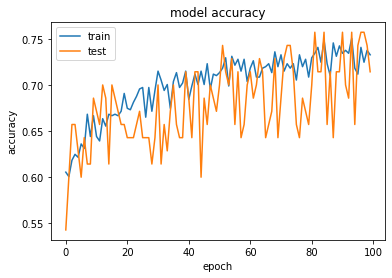

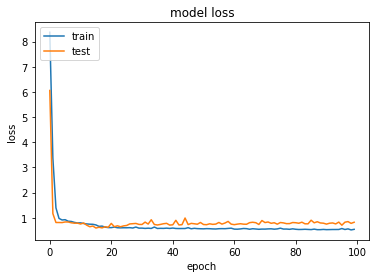

In [6]:
#change the optimizer to adam

tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # can change to "rmsprop"
# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate model with testing data

In [7]:
# evaluate the model
scores = model.evaluate(X_Test, Y_Test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

77/77 [==============================] - 0s 39us/step
accuracy: 77.92%


### Note:
TensorFlow has APIs available in several languages both for constructing and executing a TensorFlow graph. The Python API is at present the most complete and the easiest to use, but other language APIs may be easier to integrate into projects and may offer some performance advantages in graph execution.

See the [API Python](https://www.tensorflow.org/api_docs) for more details and techniques.


[Keras: The Python Deep Learning library](https://keras.io/): Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano (Note that from Keras version 2.4, it only support tensorflow backend). It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.



More to say, there is another package named [PyTorch](http://pytorch.org/) that also provide powerful python based API. You can check their [tutorial](http://pytorch.org/tutorials/) to find more details.